In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler



/Users/wanting/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [56]:
data7=pd.read_csv("data9.csv",sep=",")
data7

,date,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Nasdaq composite index,DJI
0,2018/9/19,6371.85,4.954753e+07,0.936314,479308,244259,7.020000e+12,19.013685,600992855.3,1203.30,209.470000,54.02,7950.040039,26405.75977
1,2018/9/18,6280.91,4.710505e+07,0.907648,481967,240152,7.020000e+12,17.457677,574281010.2,1200.20,197.090000,52.29,7956.109863,26246.96094
2,2018/9/17,6514.06,4.850075e+07,0.627328,370211,179483,7.020000e+12,13.070152,282353987.6,1201.90,221.580000,57.02,7895.790039,26062.11914
3,2018/9/16,6536.68,4.884968e+07,0.789859,427957,211071,7.020000e+12,15.699957,375006930.2,NaN,222.800000,56.58,NaN,NaN
4,2018/9/15,6509.40,4.605827e+07,1.057485,471372,223250,7.020000e+12,21.218931,733164598.3,NaN,209.810000,56.34,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,2015/8/11,264.34,4.427333e+05,0.381362,227498,116923,5.269984e+10,26.659978,68909307.0,1108.25,0.708087,3.95,5036.790039,17402.83984
1127,2015/8/10,265.48,4.584516e+05,0.390679,220994,110686,5.269984e+10,26.674039,93522987.0,1097.00,0.713989,3.90,5101.799805,17615.16992
1128,2015/8/9,261.12,3.536627e+05,0.354968,218499,88425,5.269984e+10,18.451625,81070335.0,NaN,0.706136,3.84,NaN,NaN
1129,2015/8/8,279.74,4.112966e+05,0.350295,233508,104420,5.269984e+10,23.042149,67351785.0,NaN,2.790000,4.22,NaN,NaN


In [57]:
data7['date'] = pd.to_datetime(data7['date']) 
data7.sort_values(by=['date'], inplace=True)
data7

,date,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Nasdaq composite index,DJI
1130,2015-08-07,278.74,3.690251e+05,0.567923,242234,124658,5.227830e+10,29.646189,64378476.0,1093.50,2.830000,4.06,5043.540039,17373.38086
1129,2015-08-08,279.74,4.112966e+05,0.350295,233508,104420,5.269984e+10,23.042149,67351785.0,NaN,2.790000,4.22,NaN,NaN
1128,2015-08-09,261.12,3.536627e+05,0.354968,218499,88425,5.269984e+10,18.451625,81070335.0,NaN,0.706136,3.84,NaN,NaN
1127,2015-08-10,265.48,4.584516e+05,0.390679,220994,110686,5.269984e+10,26.674039,93522987.0,1097.00,0.713989,3.90,5101.799805,17615.16992
1126,2015-08-11,264.34,4.427333e+05,0.381362,227498,116923,5.269984e+10,26.659978,68909307.0,1108.25,0.708087,3.95,5036.790039,17402.83984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2018-09-15,6509.40,4.605827e+07,1.057485,471372,223250,7.020000e+12,21.218931,733164598.3,NaN,209.810000,56.34,NaN,NaN
3,2018-09-16,6536.68,4.884968e+07,0.789859,427957,211071,7.020000e+12,15.699957,375006930.2,NaN,222.800000,56.58,NaN,NaN
2,2018-09-17,6514.06,4.850075e+07,0.627328,370211,179483,7.020000e+12,13.070152,282353987.6,1201.90,221.580000,57.02,7895.790039,26062.11914
1,2018-09-18,6280.91,4.710505e+07,0.907648,481967,240152,7.020000e+12,17.457677,574281010.2,1200.20,197.090000,52.29,7956.109863,26246.96094


In [58]:
data7['Nasdaq composite index']=data7['Nasdaq composite index'].fillna(method='ffill')
data7['DJI']=data7['DJI'].fillna(method='ffill')
data7['Nasdaq composite index']=data7['Nasdaq composite index'].fillna(method='bfill')
data7['DJI']=data7['DJI'].fillna(method='bfill')
data7['Gold in USD']=data7['Gold in USD'].fillna(method='ffill')
data7['Gold in USD']=data7['Gold in USD'].fillna(method='bfill')
data7

,date,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Nasdaq composite index,DJI
1130,2015-08-07,278.74,3.690251e+05,0.567923,242234,124658,5.227830e+10,29.646189,64378476.0,1093.50,2.830000,4.06,5043.540039,17373.38086
1129,2015-08-08,279.74,4.112966e+05,0.350295,233508,104420,5.269984e+10,23.042149,67351785.0,1093.50,2.790000,4.22,5043.540039,17373.38086
1128,2015-08-09,261.12,3.536627e+05,0.354968,218499,88425,5.269984e+10,18.451625,81070335.0,1093.50,0.706136,3.84,5043.540039,17373.38086
1127,2015-08-10,265.48,4.584516e+05,0.390679,220994,110686,5.269984e+10,26.674039,93522987.0,1097.00,0.713989,3.90,5101.799805,17615.16992
1126,2015-08-11,264.34,4.427333e+05,0.381362,227498,116923,5.269984e+10,26.659978,68909307.0,1108.25,0.708087,3.95,5036.790039,17402.83984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2018-09-15,6509.40,4.605827e+07,1.057485,471372,223250,7.020000e+12,21.218931,733164598.3,1201.95,209.810000,56.34,8010.040039,26154.66992
3,2018-09-16,6536.68,4.884968e+07,0.789859,427957,211071,7.020000e+12,15.699957,375006930.2,1201.95,222.800000,56.58,8010.040039,26154.66992
2,2018-09-17,6514.06,4.850075e+07,0.627328,370211,179483,7.020000e+12,13.070152,282353987.6,1201.90,221.580000,57.02,7895.790039,26062.11914
1,2018-09-18,6280.91,4.710505e+07,0.907648,481967,240152,7.020000e+12,17.457677,574281010.2,1200.20,197.090000,52.29,7956.109863,26246.96094


In [59]:
#data7.drop('Gold in USD',axis=1)

In [60]:
b=data7.values

In [61]:
b.shape[0]

1131

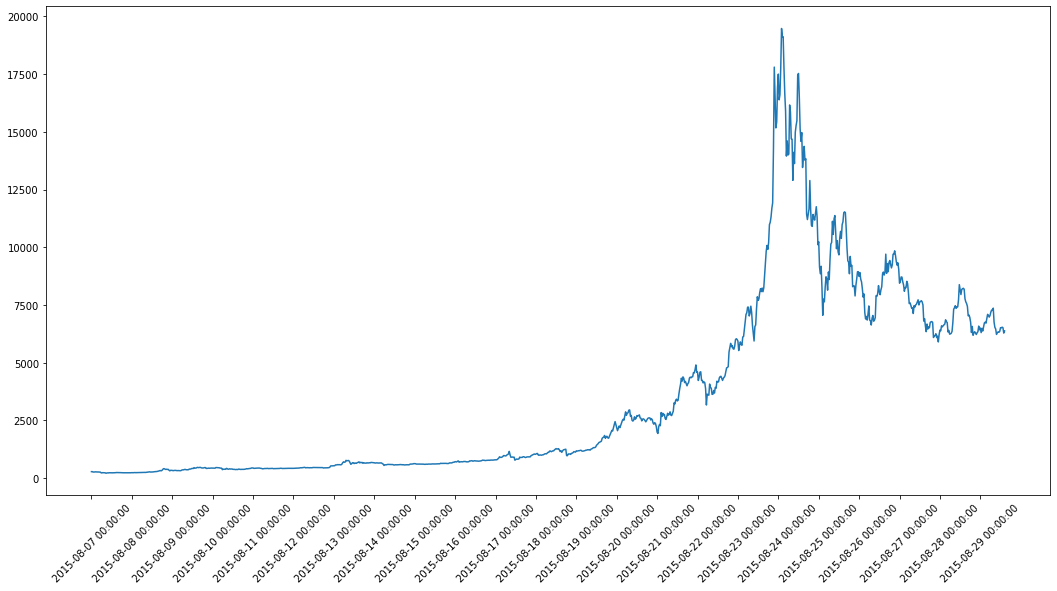

In [68]:
#draw the line chart of bitcoin price 
plt.figure(figsize=(18,9))
plt.plot(range(b.shape[0]),(data7['BTC Price']))
plt.xticks(range(0,b.shape[0],50),data7['date'],rotation=45)
plt.show()

In [9]:
data7.set_index(['date'],inplace=True)
data7

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,
2015-08-07,278.74,3.690251e+05,0.567923,242234,124658,5.227830e+10,29.646189,64378476.0,1093.50,2.830000,4.06,5043.540039,17373.38086
2015-08-08,279.74,4.112966e+05,0.350295,233508,104420,5.269984e+10,23.042149,67351785.0,1093.50,2.790000,4.22,5043.540039,17373.38086
2015-08-09,261.12,3.536627e+05,0.354968,218499,88425,5.269984e+10,18.451625,81070335.0,1093.50,0.706136,3.84,5043.540039,17373.38086
2015-08-10,265.48,4.584516e+05,0.390679,220994,110686,5.269984e+10,26.674039,93522987.0,1097.00,0.713989,3.90,5101.799805,17615.16992
2015-08-11,264.34,4.427333e+05,0.381362,227498,116923,5.269984e+10,26.659978,68909307.0,1108.25,0.708087,3.95,5036.790039,17402.83984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-15,6509.40,4.605827e+07,1.057485,471372,223250,7.020000e+12,21.218931,733164598.3,1201.95,209.810000,56.34,8010.040039,26154.66992
2018-09-16,6536.68,4.884968e+07,0.789859,427957,211071,7.020000e+12,15.699957,375006930.2,1201.95,222.800000,56.58,8010.040039,26154.66992
2018-09-17,6514.06,4.850075e+07,0.627328,370211,179483,7.020000e+12,13.070152,282353987.6,1201.90,221.580000,57.02,7895.790039,26062.11914


In [10]:
# 決定切割比例為 80%:20%
split_point = int(len(data7)*0.8)
split_point

904

In [11]:
# 切割成學習樣本以及測試樣本
train = data7.iloc[:split_point,:].copy()
test = data7.iloc[split_point:,:].copy()

In [12]:
train

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,
2015-08-07,278.74,3.690251e+05,0.567923,242234,124658,5.227830e+10,29.646189,6.437848e+07,1093.50,2.830000,4.06,5043.540039,17373.38086
2015-08-08,279.74,4.112966e+05,0.350295,233508,104420,5.269984e+10,23.042149,6.735178e+07,1093.50,2.790000,4.22,5043.540039,17373.38086
2015-08-09,261.12,3.536627e+05,0.354968,218499,88425,5.269984e+10,18.451625,8.107034e+07,1093.50,0.706136,3.84,5043.540039,17373.38086
2015-08-10,265.48,4.584516e+05,0.390679,220994,110686,5.269984e+10,26.674039,9.352299e+07,1097.00,0.713989,3.90,5101.799805,17615.16992
2015-08-11,264.34,4.427333e+05,0.381362,227498,116923,5.269984e+10,26.659978,6.890931e+07,1108.25,0.708087,3.95,5036.790039,17402.83984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31,10108.20,2.160975e+07,0.987509,531440,236609,2.600000e+12,160.300904,1.759356e+09,1345.05,1071.090000,165.30,7411.479980,26149.39063
2018-02-01,10237.30,1.513976e+07,1.042831,481100,204276,2.600000e+12,162.206236,1.618659e+09,1341.35,1119.370000,163.68,7385.859863,26186.71094
2018-02-02,9142.28,2.070395e+07,1.053963,591550,257664,2.600000e+12,214.027545,2.515366e+09,1331.15,1035.770000,142.56,7240.950195,25520.96094


In [13]:
#scale data
scaler = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaler.fit_transform(train)
testing_set_scaled = scaler.fit_transform(test)

In [14]:
# 訓練樣本再分成目標序列 y 以及因子矩陣 X
train_X = training_set_scaled[:,1:]
train_y = training_set_scaled[:,:1]
# 測試樣本再分成目標序列 y 以及因子矩陣 X
test_X = testing_set_scaled[:,1:]
test_y = testing_set_scaled[:,:1]

In [15]:
test_X

array([[0.09996543, 0.74766673, 0.30651802, ..., 0.54084995, 0.14286332,
        0.28286637],
       [0.12095909, 0.89778625, 0.62905918, ..., 0.42240465, 0.25419299,
        0.48025804],
       [0.12916842, 0.85069698, 1.        , ..., 0.50594739, 0.20623916,
        0.47349755],
       ...,
       [0.69022794, 0.26196952, 0.21145956, ..., 0.02870386, 0.83947833,
        0.88037132],
       [0.6578797 , 0.63687462, 0.61259813, ..., 0.00228961, 0.88474548,
        0.94471872],
       [0.71448912, 0.6752127 , 0.60305387, ..., 0.01195063, 0.88019037,
        1.        ]])

In [16]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(904, 12) (904, 1) (227, 12) (227, 1)


In [17]:
train_X, train_y = np.array(train_X), np.array(train_y)
test_X, test_y = np.array(test_X), np.array(test_y)

In [18]:
#LSTM
train_X = train_X.reshape((train_X.shape[0],1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0],1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(904, 1, 12) (904, 1) (227, 1, 12) (227, 1)


In [19]:
import tensorflow as tf

#use seed for reproducability of results
tf.random.set_seed(7)

#model's parameters
dropout_fraction=0.2
units=12*2
ishape=train_X.shape[1],train_X.shape[2]

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units,return_sequences=True,input_shape=ishape))
model.add(tf.keras.layers.Dropout(dropout_fraction))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1)))
#model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

#compile using mean-squared-error loss function
#model.compile(loss='mse',optimizer='adam')
model.compile(loss='mae',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 24)             3552      
_________________________________________________________________
dropout (Dropout)            (None, 1, 24)             0         
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 1)              25        
Total params: 3,577
Trainable params: 3,577
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
#train the network using input dataset
n_epochs=500
batch_size=train_X.shape[0]//5
#batch_size=8
#verbose=0 the model.fit function won't print the progress in fitting.
history=model.fit(train_X,train_y,epochs=n_epochs,batch_size=batch_size,validation_data=(test_X,test_y),verbose=1,shuffle=False)

Epoch 1/500
6/6 [==============================] - 0s 71ms/step - loss: 0.1060 - accuracy: 0.0011 - val_loss: 0.3081 - val_accuracy: 0.0044
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0970 - accuracy: 0.0011 - val_loss: 0.2932 - val_accuracy: 0.0044
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0946 - accuracy: 0.0011 - val_loss: 0.2789 - val_accuracy: 0.0044
Epoch 4/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0892 - accuracy: 0.0011 - val_loss: 0.2670 - val_accuracy: 0.0044
Epoch 5/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0858 - accuracy: 0.0011 - val_loss: 0.2574 - val_accuracy: 0.0044
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0850 - accuracy: 0.0011 - val_loss: 0.2498 - val_accuracy: 0.0044
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0794 - accuracy: 0.0011 - val_loss: 0.2442 - val_accuracy: 0.0044
Epoch 8/500
6/6 [=========

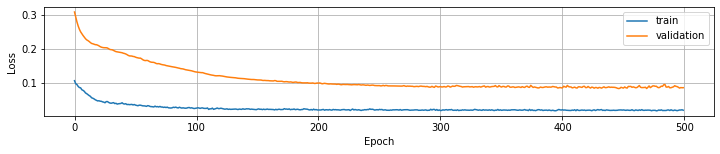

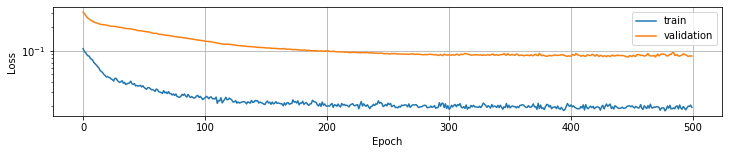

In [21]:
plt.figure(figsize=(12,2))
plt.grid()
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
_=plt.legend()

plt.figure(figsize=(12,2))
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.semilogy(history.history['loss'],label='train')
plt.semilogy(history.history['val_loss'],label='validation')
_=plt.legend()

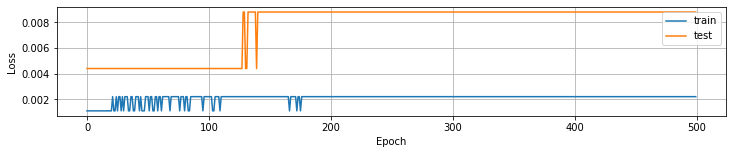

In [22]:
plt.figure(figsize=(12,2))
plt.grid()
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
_=plt.legend()

In [23]:
#prediction of bitcoin price in test sample
yhat=model.predict(test_X)
yorg=data7['BTC Price'].iloc[train_X.shape[0]:]

yhat_f=yhat.flatten()
yorg_f=yorg.values.flatten()

yhat.shape

(227, 1, 1)

In [24]:
z=np.zeros((len(test),13))
z[:,0]=yhat_f
yhat_inv=scaler.inverse_transform(z)[:,0]
yhat_inv

array([ 8679.68529658,  8599.37002503,  9669.25583071,  8664.87474885,
        8845.67096354,  9304.86326195,  8476.83387035,  8204.71156977,
        9227.5638997 ,  8937.6668597 , 10209.97658173, 10542.46979337,
       10241.54481178, 10073.91056192,  9664.88737148, 10162.17036422,
       10549.54402414, 10285.03663847, 10849.71674953, 10373.95802323,
        9902.31118305,  9663.67973161, 10220.96455972, 10519.06858055,
       10446.18603686, 10675.56910278, 10256.52680004,  9612.74560594,
        9706.55363356, 10273.77697509,  9765.1339062 ,  9849.94474814,
        9487.17423182, 10301.12148806,  8939.72414608,  9136.3877613 ,
        9177.41527727,  9223.1091325 ,  8834.0297988 ,  9063.9058612 ,
        8866.78686231,  8113.3470315 ,  8293.77736086,  8704.76414148,
        8821.06009588,  8580.32753241,  8352.7278846 ,  8481.53782242,
        7859.10240182,  8119.22604805,  8164.22070801,  7861.70725683,
        7771.72431767,  7645.83491381,  7887.48529701,  7191.96432428,
      

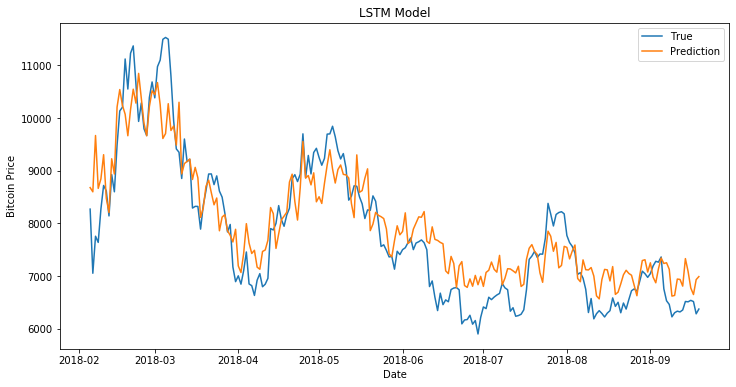

In [27]:
yorg_df=pd.DataFrame(yorg_f,index=test.index)
yhat_df=pd.DataFrame(yhat_inv,index=test.index)
plt.figure(figsize=(12,6))
plt.plot(yorg_df,label='True')
plt.plot(yhat_df,label='Prediction')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('LSTM Model')
plt.legend()
plt.show()

In [28]:
#test['BTC Price'].plot()

In [29]:
from sklearn.metrics import mean_squared_error
test_score=np.sqrt(mean_squared_error(yorg_f,yhat_inv))
print('Test Score: %.2f RMSE' % (test_score))

Test Score: 593.86 RMSE


In [30]:
from sklearn.metrics import mean_squared_error
test_score=mean_squared_error(yorg_f,yhat_inv)
print('Test Score: %.2f RMSE' % (test_score))

Test Score: 352673.79 RMSE


In [31]:
from sklearn.metrics import mean_squared_error
test_score=np.sqrt(mean_squared_error(test_y,yhat_f))
print('Test Score: %.2f RMSE' % (test_score))

Test Score: 0.11 RMSE


In [32]:
from sklearn.metrics import r2_score
print('RSquared :','{:.2%}'.format(r2_score(yorg_f,yhat_inv)))

RSquared : 80.53%


In [33]:
from sklearn.metrics import mean_absolute_error
test_score3=np.sqrt(mean_absolute_error(test_y,yhat_f))
print('Test Score: %.2f MAE' % (test_score3))

Test Score: 0.29 MAE


In [34]:
from sklearn.metrics import mean_absolute_error
test_score4=np.sqrt(mean_absolute_error(yorg_f,yhat_inv))
print('Test Score: %.2f MAE' % (test_score4))

Test Score: 21.95 MAE


In [35]:
#LinearRegression
#import libraries
import sklearn
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LinearRegression



In [36]:
data7

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,
2015-08-07,278.74,3.690251e+05,0.567923,242234,124658,5.227830e+10,29.646189,64378476.0,1093.50,2.830000,4.06,5043.540039,17373.38086
2015-08-08,279.74,4.112966e+05,0.350295,233508,104420,5.269984e+10,23.042149,67351785.0,1093.50,2.790000,4.22,5043.540039,17373.38086
2015-08-09,261.12,3.536627e+05,0.354968,218499,88425,5.269984e+10,18.451625,81070335.0,1093.50,0.706136,3.84,5043.540039,17373.38086
2015-08-10,265.48,4.584516e+05,0.390679,220994,110686,5.269984e+10,26.674039,93522987.0,1097.00,0.713989,3.90,5101.799805,17615.16992
2015-08-11,264.34,4.427333e+05,0.381362,227498,116923,5.269984e+10,26.659978,68909307.0,1108.25,0.708087,3.95,5036.790039,17402.83984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-15,6509.40,4.605827e+07,1.057485,471372,223250,7.020000e+12,21.218931,733164598.3,1201.95,209.810000,56.34,8010.040039,26154.66992
2018-09-16,6536.68,4.884968e+07,0.789859,427957,211071,7.020000e+12,15.699957,375006930.2,1201.95,222.800000,56.58,8010.040039,26154.66992
2018-09-17,6514.06,4.850075e+07,0.627328,370211,179483,7.020000e+12,13.070152,282353987.6,1201.90,221.580000,57.02,7895.790039,26062.11914


In [37]:
# 切割成學習樣本以及測試樣本
train5 = data7.iloc[:split_point,:].values
test5 = data7.iloc[split_point:,:].values
scaler = MinMaxScaler(feature_range = (0, 1))
training_set_scaled5 = scaler.fit_transform(train5)
testing_set_scaled5 = scaler.fit_transform(test5)

In [38]:
x_train5=training_set_scaled5[:,1:]
y_train5=training_set_scaled5[:,0]
x_test5=testing_set_scaled5[:,1:]
y_test5=testing_set_scaled5[:,0]

In [39]:
lm=LinearRegression() #run linear regression
lm.fit(x_train5,y_train5) #put train data into linear regression 

LinearRegression()

In [40]:
print(lm.intercept_) #show intercept
print(lm.coef_) #show coefficient

-2.999114860763319e-07
[-0.08886786 -0.02077888  0.16924911 -0.07153552  0.30696779 -0.13767105
  0.48696772 -0.00452981 -0.07252098  0.51235901 -0.08107727  0.08214751]


In [41]:
predict = lm.predict(x_test5) #predict data
print(metrics.mean_squared_error(y_test5, predict)) #print the squared error

0.026284502999945628


In [42]:
predict

array([0.45277208, 0.42026644, 0.60949363, 0.48909385, 0.53379909,
       0.58759787, 0.37812673, 0.32277394, 0.54952634, 0.46276324,
       0.64730641, 0.69167165, 0.62963657, 0.5908822 , 0.53716461,
       0.63176753, 0.74340477, 0.71323881, 0.9256297 , 0.73608923,
       0.65532174, 0.5543824 , 0.65114334, 0.72234868, 0.80915017,
       0.80043785, 0.70534095, 0.57116531, 0.59130292, 0.71909399,
       0.61541768, 0.66590737, 0.58512811, 0.7703118 , 0.47845211,
       0.51190577, 0.52703422, 0.5618018 , 0.51602498, 0.54817712,
       0.50738114, 0.38366815, 0.43431016, 0.51740406, 0.52667158,
       0.50934701, 0.4858686 , 0.51031136, 0.37885853, 0.45096559,
       0.46265844, 0.41000967, 0.38661691, 0.39084058, 0.45403891,
       0.26810701, 0.26569518, 0.34073183, 0.4365072 , 0.35817256,
       0.33687662, 0.35299311, 0.2722767 , 0.26279432, 0.32490066,
       0.33298975, 0.37087531, 0.498173  , 0.456016  , 0.30403803,
       0.3405758 , 0.40494205, 0.42713784, 0.43718412, 0.58507

In [43]:
y_test5_f=y_test5.flatten()

In [44]:
z3=np.zeros((len(test),13))
w3=np.zeros((len(test),13))
z3[:,0]=predict
w3[:,0]=y_test5_f
predict_inv=scaler.inverse_transform(z3)[:,0]
y_test5_inv=scaler.inverse_transform(w3)[:,0]

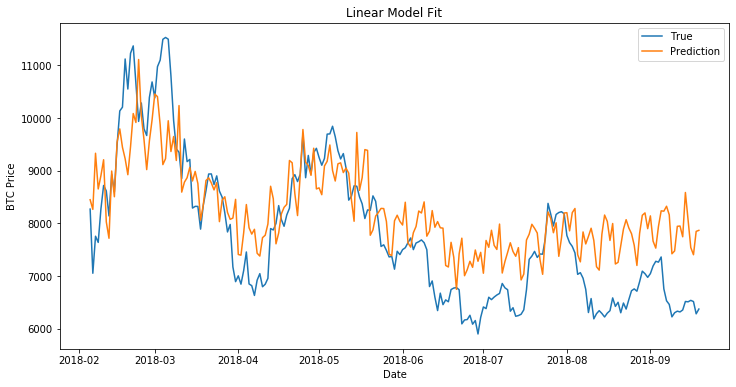

In [45]:
y_test5_df=pd.DataFrame(y_test5_inv,index=test.index)
predict_df=pd.DataFrame(predict_inv,index=test.index)
plt.figure(figsize=(12,6))
plt.title('Linear Model Fit')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.plot(y_test5_df,label='True')
plt.plot(predict_df,label='Prediction')
plt.legend()

In [46]:
from sklearn.metrics import mean_squared_error
test_score=np.sqrt(mean_squared_error(y_test5_inv,predict_inv))
print('Test Score: %.2f RMSE' % (test_score))

Test Score: 913.46 RMSE


In [47]:
test_score=np.sqrt(mean_squared_error(y_test5,predict))
print('Test Score: %.2f RMSE' % (test_score))

Test Score: 0.16 RMSE


In [48]:
from sklearn.metrics import r2_score
print('RSquared :','{:.2%}'.format(r2_score(y_test5,predict)))

RSquared : 53.95%


In [49]:
from sklearn.metrics import mean_absolute_error
test_score2=np.sqrt(mean_absolute_error(y_test5,predict))
print('Test Score: %.2f MAE' % (test_score2))

Test Score: 0.37 MAE


In [50]:
from sklearn.metrics import mean_absolute_error
test_score2=np.sqrt(mean_absolute_error(y_test5_inv,predict_inv))
print('Test Score: %.2f MAE' % (test_score2))

Test Score: 27.44 MAE
